<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pycountry-convert


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Column names
print('This is the list of column names available in the dataset: \n', df.columns.tolist())

# Dtypes and shape
print('\nThis table shows the types of each column in the dataset: \n', df.dtypes)
print('\nThis shows the number of rows/cols in the dataset: \n', df.shape)

This is the list of column names available in the dataset: 
 ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'Offic

In [4]:
# Dataframe summary (without missing values)
print('The summary for all non-numerical columns in dataset:')
df.describe(include='object')

The summary for all non-numerical columns in dataset:


,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
count,65437,65437,65437,54806,65437,54466,60784,60488,49237,40897,...,27710,28911,28844,28251,27764,28491,28807,28858,56182,56238
unique,5,8,110,3,1,118,8,418,10853,113,...,5,5,5,954,514,3,9,15,3,3
top,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Appropriate in length,Easy
freq,50207,23911,39041,23015,65437,9993,24942,3674,603,6947,...,14426,10951,9341,2364,2834,13230,15813,11918,38767,30071


In [5]:
print('The summary for all numerical columns in dataset:')
df.describe()

The summary for all numerical columns in dataset:


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [6]:
print('The summary for all numerical columnsincluding missing values in dataset:')
df.describe(include='all')

The summary for all numerical columnsincluding missing values in dataset:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [7]:
## Write your code here
# Missing values in data
# Show all rows (set max rows to None)
pd.reset_option('display.max_rows')

# Checking the values columns and how many missing values they have
df.isnull().sum().sort_values(ascending=False)

# Since most of these will not be used in the lab, lets drop
keep_columns = ['Employment',
                'JobSat',
                'YearsCodePro',
                'LanguageHaveWorkedWith',
                'LanguageWantToWorkWith',
                'RemoteWork',
                'EdLevel',
                'Country'
               ]
# Filtering columns based on lab needs
filtered_data = df[keep_columns]

# Checking missing from filtered data
filtered_data.isnull().sum().sort_values(ascending=False)

JobSat                    36311
YearsCodePro              13827
RemoteWork                10631
LanguageWantToWorkWith     9685
Country                    6507
LanguageHaveWorkedWith     5692
EdLevel                    4653
Employment                    0
dtype: int64

In [8]:
filtered_data.dtypes

Employment                 object
JobSat                    float64
YearsCodePro               object
LanguageHaveWorkedWith     object
LanguageWantToWorkWith     object
RemoteWork                 object
EdLevel                    object
Country                    object
dtype: object

In [9]:
filtered_data.describe(include='object')

,Employment,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,RemoteWork,EdLevel,Country
count,65437,51610,59745,55752,54806,60784,58930
unique,110,52,23864,22769,3,8,185
top,"Employed, full-time",2,HTML/CSS;JavaScript;TypeScript,Python,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America
freq,39041,4168,1002,922,23015,24942,11095


Based on the above output, we can tell that there is signicant missing data in the first JobSat, while the rest are less so. I will leave cleaning to when they are needed in the tasks ahead.

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [10]:
## Write your code here
# Employment value counts
print(df['Employment'].value_counts(dropna=False), "\n")

# Job Satisfaction value counts
print(df['JobSat'].value_counts(dropna=False), "\n")

# Years of professional coding experience
print(df['YearsCodePro'].value_counts(dropna=False), "\n")


Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


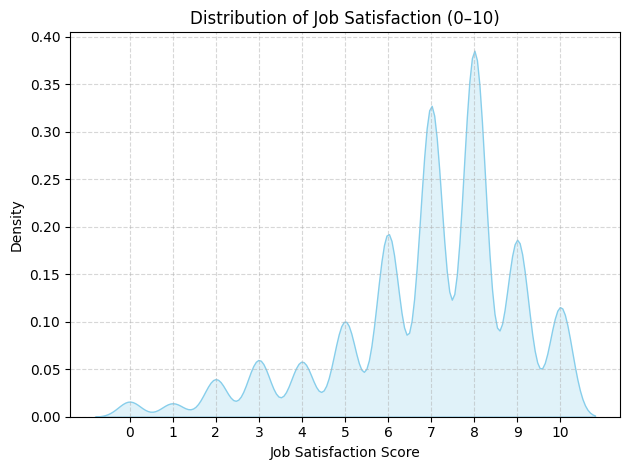

In [11]:
## Write your code here
# Drop missing values first
job_sat_clean = df['JobSat'].dropna()

# Plotting KDE
sns.kdeplot(job_sat_clean, fill=True, color='skyblue')
plt.title('Distribution of Job Satisfaction (0–10)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')
plt.xticks(range(0, 11))  # Adjust to include 0
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


With only 45% of the total 65437 respondents to the survey who reported a job satisfaction scores, a significant portion (approximately 25%) gave a score of exactly 8, making it the most common single satisfaction rating. The simple analysis into why this reading is so significant can be interpreted as people generally consider thier current situations can be improved in some way or form. Whether its better work environment, remote job oppurtunities or any other factor would need to be investigated further.

Overall, about 67% of respondents scored 7 or above, indicating a generally positive level of satisfaction within the coding industry.

However, the presence of around 300 respondents who scored 0 and an overall of 8% scoring below 4 shows that a notable minority are completely dissatisfied, highlighting areas where workplace factors could be improved.

Further analysis is needed to understand how job satisfaction correlates with other factors like employment type, education, or workload.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [12]:
# Investigating available data for HaveWorkedWith
print(filtered_data['LanguageHaveWorkedWith'].value_counts())

# Finding null and total entries
print('\n Total number of null: ', filtered_data['LanguageHaveWorkedWith'].isnull().sum())
print('\n Total number of entries: ', filtered_data['LanguageHaveWorkedWith'].value_counts().sum())

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                    1002
Python                                                                             832
HTML/CSS;JavaScript;PHP;SQL                                                        503
C#                                                                                 452
HTML/CSS;JavaScript                                                                452
                                                                                  ... 
Dart;Java;JavaScript;Kotlin;PowerShell;Python;SQL;TypeScript                         1
C#;Go;Java;JavaScript;Perl;Python;SQL;TypeScript                                     1
C;HTML/CSS;JavaScript;MATLAB;PHP;Python;TypeScript                                   1
C;Dart;Delphi;Java;Kotlin;Objective-C;PHP;SQL                                        1
Bash/Shell (all shells);C;C#;C++;Go;HTML/CSS;JavaScript;Lua;PHP;SQL;TypeScript       1
Name: count, Length:

In [13]:
# Investigating available data for WantToWorkedWith
print(filtered_data['LanguageWantToWorkWith'].value_counts())

# Finding null and total entries
print('\n Total number of null: ', filtered_data['LanguageWantToWorkWith'].isnull().sum())
print('\n Total number of entries: ', filtered_data['LanguageWantToWorkWith'].value_counts().sum())

LanguageWantToWorkWith
Python                                                                          922
Rust                                                                            737
HTML/CSS;JavaScript;TypeScript                                                  632
C#                                                                              538
Go                                                                              460
                                                                               ... 
Assembly;Bash/Shell (all shells);C;C++;HTML/CSS;Lua;MATLAB;PowerShell;Python      1
Bash/Shell (all shells);HTML/CSS;Java;Kotlin;Python;Ruby;Rust;SQL;TypeScript      1
Bash/Shell (all shells);Java;Rust;Scala;SQL;TypeScript                            1
Dart;F#;TypeScript                                                                1
C#;Dart;Go;HTML/CSS;JavaScript;Python;R;SQL;TypeScript                            1
Name: count, Length: 22769, dtype: int64

 Total numb

In [14]:
# Slicing data from main df for cleaning
df_have_data = filtered_data['LanguageHaveWorkedWith'].dropna()
df_want_data = filtered_data['LanguageWantToWorkWith'].dropna()

# Exploding data due to multilabeling in each row
exploded_having_data = df_have_data.str.split(';').explode()
exploded_want_data = df_want_data.str.split(';').explode()

# Counting rows for each to get full data
having_counts = exploded_having_data.value_counts()
want_counts = exploded_want_data.value_counts()

# Saving them for comparison in new DFrame
comparing_languages = pd.DataFrame({
    'HaveWorkedWith': having_counts,
    'WantToWorkWith': want_counts
}).fillna(0)

comparing_languages

,HaveWorkedWith,WantToWorkWith
Ada,542,558
Apex,502,389
Assembly,3233,3007
Bash/Shell (all shells),20412,13744
C,12184,8275
C#,16318,12921
C++,13827,10873
Clojure,737,1331
Cobol,413,399
Crystal,253,407


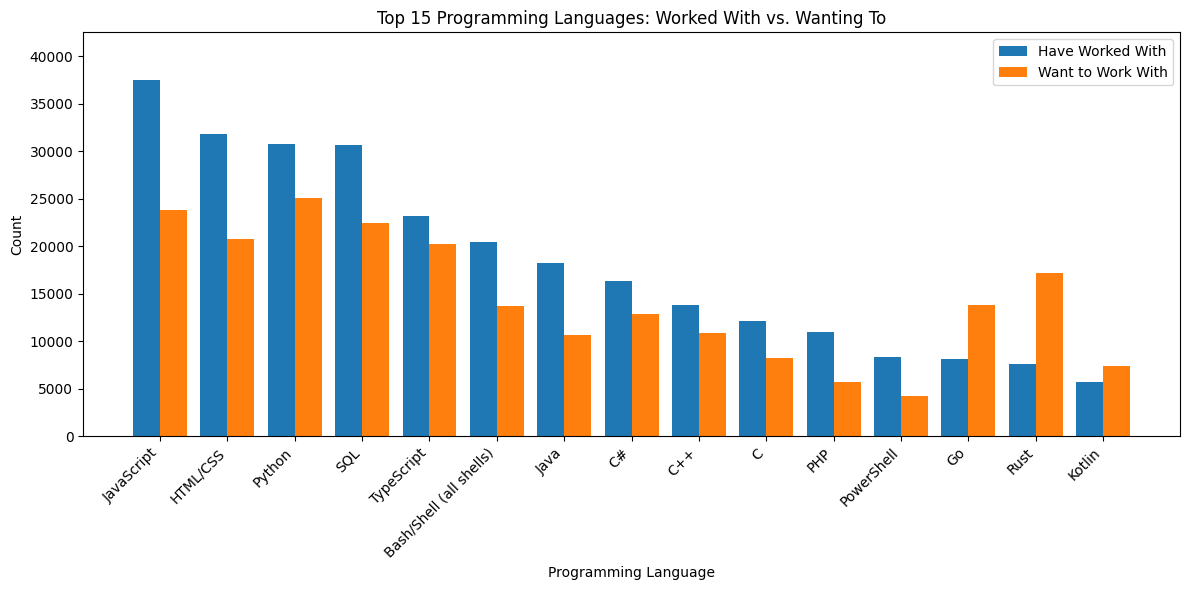

In [15]:
# Using only top 15 and plotting the collected data
sort_lang_top15 = comparing_languages.sort_values(by='HaveWorkedWith', ascending=False).head(15)

plt.figure(figsize=(12,6))
bar_width = 0.4
index = range(len(sort_lang_top15))

plt.bar(index, sort_lang_top15['HaveWorkedWith'], 
        bar_width, label='Have Worked With')
plt.bar([i+bar_width for i in index], sort_lang_top15['WantToWorkWith'],
        bar_width, label='Want to Work With')

plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Top 15 Programming Languages: Worked With vs. Wanting To')
plt.xticks([i + bar_width / 2 for i in index], sort_lang_top15.index, rotation=45, ha='right')
plt.ylim(0, 42500)
plt.legend()
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [16]:
country_label = {
    'Aruba': 'ABW',
    'Afghanistan': 'AFG',
    'Angola': 'AGO',
    'Anguilla': 'AIA',
    'Åland Islands': 'ALA',
    'Albania': 'ALB',
    'Andorra': 'AND',
    'United Arab Emirates': 'ARE',
    'Argentina': 'ARG',
    'Armenia': 'ARM',
    'American Samoa': 'ASM',
    'Antarctica': 'ATA',
    'French Southern Territories': 'ATF',
    'Antigua and Barbuda': 'ATG',
    'Australia': 'AUS',
    'Austria': 'AUT',
    'Azerbaijan': 'AZE',
    'Burundi': 'BDI',
    'Belgium': 'BEL',
    'Benin': 'BEN',
    'Bonaire, Sint Eustatius and Saba': 'BES',
    'Burkina Faso': 'BFA',
    'Bangladesh': 'BGD',
    'Bulgaria': 'BGR',
    'Bahrain': 'BHR',
    'Bahamas': 'BHS',
    'Bosnia and Herzegovina': 'BIH',
    'Saint Barthélemy': 'BLM',
    'Belarus': 'BLR',
    'Belize': 'BLZ',
    'Bermuda': 'BMU',
    'Bolivia': 'BOL',
    'Bolivia, Plurinational State of': 'BOL',
    'Brazil': 'BRA',
    'Barbados': 'BRB',
    'Brunei Darussalam': 'BRN',
    'Bhutan': 'BTN',
    'Bouvet Island': 'BVT',
    'Botswana': 'BWA',
    'Central African Republic': 'CAF',
    'Canada': 'CAN',
    'Cocos (Keeling) Islands': 'CCK',
    'Switzerland': 'CHE',
    'Chile': 'CHL',
    'China': 'CHN',
    "Côte d'Ivoire": 'CIV',
    "Côte D'Ivoire": 'CIV',
    'Cameroon': 'CMR',
    'Congo, Democratic Republic of the': 'COD',
    'Democratic Republic of the Congo': 'COD',
    'Congo, Republic of the...': 'COG',
    'Congo': 'COG',
    'Cook Islands': 'COK',
    'Colombia': 'COL',
    'Comoros': 'COM',
    'Cabo Verde': 'CPV',
    'Cape Verde': 'CPV',
    'Costa Rica': 'CRI',
    'Cuba': 'CUB',
    'Curaçao': 'CUW',
    'Christmas Island': 'CXR',
    'Cayman Islands': 'CYM',
    'Cyprus': 'CYP',
    'Czechia': 'CZE',
    'Czech Republic': 'CZE',
    'Germany': 'DEU',
    'Djibouti': 'DJI',
    'Dominica': 'DMA',
    'Denmark': 'DNK',
    'Dominican Republic': 'DOM',
    'Algeria': 'DZA',
    'Ecuador': 'ECU',
    'Egypt': 'EGY',
    'Eritrea': 'ERI',
    'Western Sahara': 'ESH',
    'Spain': 'ESP',
    'Estonia': 'EST',
    'Ethiopia': 'ETH',
    'Finland': 'FIN',
    'Fiji': 'FJI',
    'Falkland Islands (Malvinas)': 'FLK',
    'France': 'FRA',
    'Faroe Islands': 'FRO',
    'Micronesia, Federated States of...': 'FSM',
    'Gabon': 'GAB',
    'United Kingdom of Great Britain and Northern Ireland': 'GBR',
    'Georgia': 'GEO',
    'Guernsey': 'GGY',
    'Ghana': 'GHA',
    'Gibraltar': 'GIB',
    'Guinea': 'GIN',
    'Guadeloupe': 'GLP',
    'Gambia': 'GMB',
    'Guinea-Bissau': 'GNB',
    'Equatorial Guinea': 'GNQ',
    'Greece': 'GRC',
    'Grenada': 'GRD',
    'Greenland': 'GRL',
    'Guatemala': 'GTM',
    'French Guiana': 'GUF',
    'Guam': 'GUM',
    'Guyana': 'GUY',
    'Hong Kong': 'HKG',
    'Hong Kong (S.A.R.)':'HKG',
    'Heard Island and McDonald Islands': 'HMD',
    'Honduras': 'HND',
    'Croatia': 'HRV',
    'Haiti': 'HTI',
    'Hungary': 'HUN',
    'Indonesia': 'IDN',
    'Isle of Man': 'IMN',
    'India': 'IND',
    'British Indian Ocean Territory': 'IOT',
    'Ireland': 'IRL',
    'Iran, Islamic Republic of...': 'IRN',
    'Iraq': 'IRQ',
    'Iceland': 'ISL',
    'Israel': 'ISR',
    'Italy': 'ITA',
    'Jamaica': 'JAM',
    'Jersey': 'JEY',
    'Jordan': 'JOR',
    'Japan': 'JPN',
    'Kazakhstan': 'KAZ',
    'Kenya': 'KEN',
    'Kyrgyzstan': 'KGZ',
    'Cambodia': 'KHM',
    'Kiribati': 'KIR',
    'Saint Kitts and Nevis': 'KNA',
    'Korea, Republic of': 'KOR',
    'Republic of Korea': 'KOR',
    'South Korea': 'KOR',
    'Kuwait': 'KWT',
    "Lao People's Democratic Republic": 'LAO',
    'Lebanon': 'LBN',
    'Liberia': 'LBR',
    'Libya': 'LBY',
    'Libyan Arab Jamahiriya': 'LBY',
    'Saint Lucia': 'LCA',
    'Liechtenstein': 'LIE',
    'Sri Lanka': 'LKA',
    'Lesotho': 'LSO',
    'Lithuania': 'LTU',
    'Luxembourg': 'LUX',
    'Latvia': 'LVA',
    'Macao': 'MAC',
    'Saint Martin (French part)': 'MAF',
    'Morocco': 'MAR',
    'Monaco': 'MCO',
    'Moldova, Republic of': 'MDA',
    'Republic of Moldova': 'MDA',
    'Madagascar': 'MDG',
    'Maldives': 'MDV',
    'Mexico': 'MEX',
    'Marshall Islands': 'MHL',
    'North Macedonia': 'MKD',
    'Republic of North Macedonia': 'MKD',
    'Mali': 'MLI',
    'Malta': 'MLT',
    'Myanmar': 'MMR',
    'Montenegro': 'MNE',
    'Mongolia': 'MNG',
    'Northern Mariana Islands': 'MNP',
    'Mozambique': 'MOZ',
    'Mauritania': 'MRT',
    'Montserrat': 'MSR',
    'Martinique': 'MTQ',
    'Mauritius': 'MUS',
    'Malawi': 'MWI',
    'Malaysia': 'MYS',
    'Mayotte': 'MYT',
    'Namibia': 'NAM',
    'New Caledonia': 'NCL',
    'Niger': 'NER',
    'Norfolk Island': 'NFK',
    'Nigeria': 'NGA',
    'Nicaragua': 'NIC',
    'Niue': 'NIU',
    'Netherlands, Kingdom of the': 'NLD',
    'Netherlands': 'NLD', 
    'Norway': 'NOR',
    'Nepal': 'NPL',
    'Nauru': 'NRU',
    'New Zealand': 'NZL',
    'Oman': 'OMN',
    'Pakistan': 'PAK',
    'Panama': 'PAN',
    'Pitcairn': 'PCN',
    'Peru': 'PER',
    'Philippines': 'PHL',
    'Palau': 'PLW',
    'Papua New Guinea': 'PNG',
    'Poland': 'POL',
    'Puerto Rico': 'PRI',
    "Korea, Democratic People's Republic of": 'PRK',
    'North Korea':'PRK',
    "Democratic People's Republic of Korea": 'PRK',
    'Kosovo': 'XKX',
    ' Kosovo': 'XKX',
    'Kosovo ': 'XKX',
    'Portugal': 'PRT',
    'Paraguay': 'PRY',
    'Palestine, State of': 'PSE',
    'Palestine': 'PSE',
    'French Polynesia': 'PYF',
    'Qatar': 'QAT',
    'Réunion': 'REU',
    'Romania': 'ROU',
    'Russian Federation': 'RUS',
    'Rwanda': 'RWA',
    'Saudi Arabia': 'SAU',
    'Sudan': 'SDN',
    'Senegal': 'SEN',
    'Singapore': 'SGP',
    'South Georgia and the South Sandwich Islands': 'SGS',
    'Saint Helena, Ascension and Tristan da Cunha': 'SHN',
    'Svalbard and Jan Mayen': 'SJM',
    'Solomon Islands': 'SLB',
    'Sierra Leone': 'SLE',
    'El Salvador': 'SLV',
    'San Marino': 'SMR',
    'Somalia': 'SOM',
    'Saint Pierre and Miquelon': 'SPM',
    'Serbia': 'SRB',
    'South Sudan': 'SSD',
    'Sao Tome and Principe': 'STP',
    'Suriname': 'SUR',
    'Slovakia': 'SVK',
    'Slovenia': 'SVN',
    'Sweden': 'SWE',
    'Eswatini': 'SWZ',
    'Swaziland': 'SWZ',
    'Sint Maarten (Dutch part)': 'SXM',
    'Seychelles': 'SYC',
    'Syrian Arab Republic': 'SYR',
    'Turks and Caicos Islands': 'TCA',
    'Chad': 'TCD',
    'Togo': 'TGO',
    'Thailand': 'THA',
    'Tajikistan': 'TJK',
    'Tokelau': 'TKL',
    'Turkmenistan': 'TKM',
    'Timor-Leste': 'TLS',
    'Tonga': 'TON',
    'Trinidad and Tobago': 'TTO',
    'Tunisia': 'TUN',
    'Türkiye': 'TUR',
    'Turkey': 'TUR',
    'Tuvalu': 'TUV',
    'Taiwan, Province of China': 'TWN',
    'Taiwan': 'TWN',
    'Tanzania, United Republic of': 'TZA',
    'United Republic of Tanzania': 'TZA',
    'Uganda': 'UGA',
    'Ukraine': 'UKR',
    'United States Minor Outlying Islands': 'UMI',
    'Uruguay': 'URY',
    'United States of America': 'USA',
    'Uzbekistan': 'UZB',
    'Holy See': 'VAT',
    'Saint Vincent and the Grenadines': 'VCT',
    'Venezuela, Bolivarian Republic of...': 'VEN',
    'Virgin Islands (British)': 'VGB',
    'Virgin Islands (U.S.)': 'VIR',
    'Viet Nam': 'VNM',
    'Vanuatu': 'VUT',
    'Wallis and Futuna': 'WLF',
    'Samoa': 'WSM',
    'Yemen': 'YEM',
    'South Africa': 'ZAF',
    'Zambia': 'ZMB',
    'Zimbabwe': 'ZWE',
}

import pycountry_convert as pc

def alpha3_to_continent(alpha3):
    try:
        alpha2 = pc.country_alpha3_to_country_alpha2(alpha3)
        cont_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(cont_code)
    except:
        return 'Unknown'

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64 
 



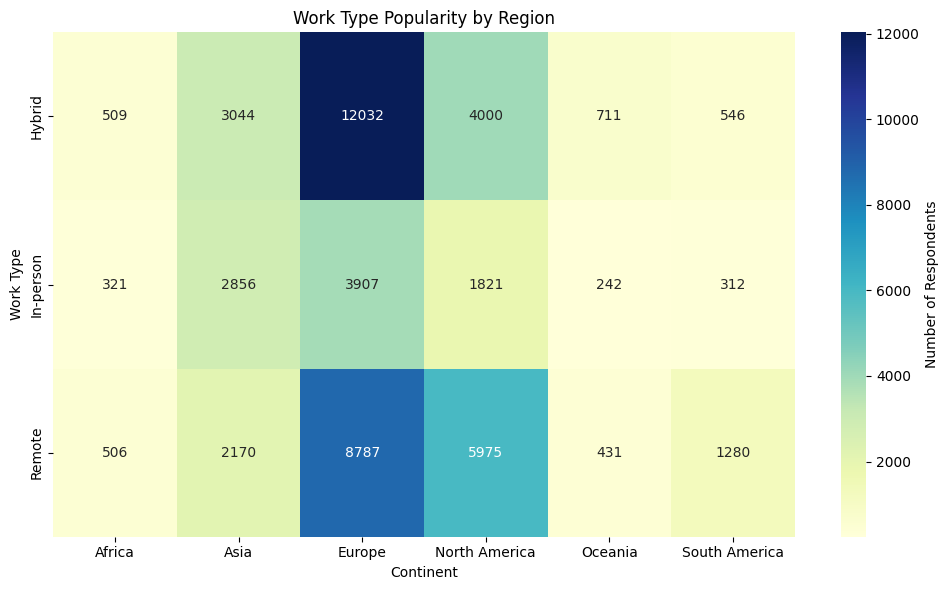

In [17]:
## Write your code here
# Check values in column RemoteWork
print(filtered_data['RemoteWork'].value_counts(),'\n \n')

# Dropping missing values from data
df_country_remote = filtered_data[['Country', 'RemoteWork']].dropna()

# Replacing shortened version of naming in RemoteWork
df_country_remote['RemoteWork'] = df_country_remote['RemoteWork'].replace({'Hybrid (some remote, some in-person)': 'Hybrid'})

# Changing names to Alpha3 and adding Continent region
df_country_remote['Country_ISO3'] = df_country_remote['Country'].map(country_label)
df_country_remote['Continent'] = df_country_remote['Country_ISO3'].apply(alpha3_to_continent)

# Grouping
remote_region_counts = df_country_remote.groupby(['Continent', 'RemoteWork']).size().reset_index(name='Count')
remote_region_counts = remote_region_counts[remote_region_counts['Continent'] != 'Unknown']

# Pivot to create a matrix of languages vs continent
heatmap_data = (
    remote_region_counts
    .pivot_table(
        index='RemoteWork',
        columns='Continent',
        values='Count',
        aggfunc='sum',
        fill_value=0
    )
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu',  cbar_kws={'label': 'Number of Respondents'})
plt.title('Work Type Popularity by Region')
plt.xlabel('Continent')
plt.ylabel('Work Type')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [18]:
## Write your code here
# Checking how many values in each are available
print(filtered_data['JobSat'].value_counts().sum())
print(filtered_data['YearsCodePro'].value_counts().sum())

'''
Based on low level data available for JobSat (about 44.5%)
best to drop missing values and test correlation.
'''
# Dropping missing values
df_corr = filtered_data[['JobSat', 'YearsCodePro']].dropna()

# Replacing values in YearsCodePro
df_corr['YearsCodePro'] = df_corr['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 55
})

# Pearson Corr
corr_pearson = df_corr.corr()

# Spearman Corr
corr_spearman = df_corr.corr(method='spearman')

print('Pearson correlation is: \n', corr_pearson)
print('Spearman correlation is: \n', corr_spearman)

29126
51610
Pearson correlation is: 
                 JobSat  YearsCodePro
JobSat        1.000000      0.104233
YearsCodePro  0.104233      1.000000
Spearman correlation is: 
                 JobSat  YearsCodePro
JobSat        1.000000      0.119201
YearsCodePro  0.119201      1.000000


Based on the below results, we can say that there is very little to no correlation between the number of years a person is a professional coder to the overall job satisfaction. There might be another variable that is needs to be investigated further.

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [19]:
custom_order = [
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Something else',
    'Some college/university study without earning a degree',
    'Associate degree (A.A., A.S., etc.)',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
]

4653
0
546


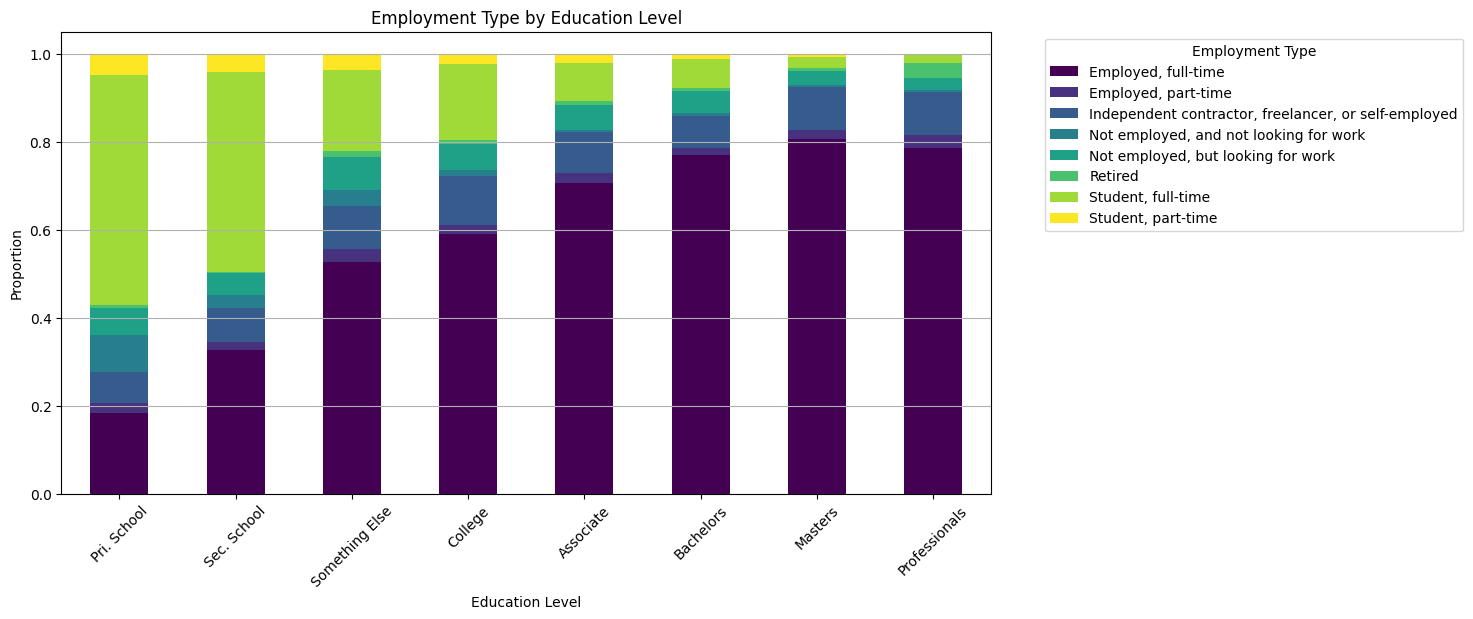

In [20]:
## Write your code here
# Checking for missing and unnecassary values in original dataset
print(filtered_data['EdLevel'].isnull().sum())
print(filtered_data['Employment'].isnull().sum())
print(filtered_data[filtered_data['Employment'] == 'I prefer not to say'].shape[0])
'''
Based on this small factor, we will drop missing values
4.6k from EdLevel is missing, but small comparable to full
data set of 64k. Overall, 93% will be used. We will also drop
any rows with Employment as 'I prefer not to say', as this data
is not very signicant for the investigation and (as shown above),
it is only worth 546 rows of data. This is 0.8% of the overall data count,
which is an accepted amount to drop.
'''

# Dropping NaN  and reseting index
df_ed_employ = df[['EdLevel', 'Employment']].dropna()
df_ed_employ = df_ed_employ[df_ed_employ['Employment'] != 'I prefer not to say']
df_ed_employ = df_ed_employ.reset_index()

# As shown, the data is quite messy for employment.
df_ed_employ['EdLevel'].value_counts()
df_ed_employ['Employment'].value_counts()

# Cleaning data
df_ed_employ['EmploymentPrimary'] = df_ed_employ['Employment'].str.split(';').str[0].str.strip()

# Plotting
edu_emp_ct = pd.crosstab(df_ed_employ['EdLevel'], df_ed_employ['EmploymentPrimary'], normalize='index').reindex(custom_order)
ax = edu_emp_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
ax.set_xticklabels([
    'Pri. School',
    'Sec. School',
    'Something Else',
    'College',
    'Associate',
    'Bachelors',
    'Masters',
    'Professionals'
], rotation = 45)
ax.yaxis.grid(True)
plt.title('Employment Type by Education Level')
plt.ylabel('Proportion')
plt.xlabel('Education Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The data suggests a clear trend:
As education level increases, so does the likelihood of securing full-time employment. Individuals with Bachelor’s, Master’s, or Professional degrees are more likely to be employed full-time, while those with lower levels of education tend to have higher proportions of part-time work or are still students.

Interestingly, the rate of independent contracting or freelancing appears relatively consistent across all education levels — from primary school up to professional degrees. This may indicate that self-employment is driven more by individual choice or opportunity than formal education background.

Another notable observation is that Bachelor’s degree holders show a lower tendency toward part-time work compared to all other groups. This could reflect that graduates at this level are more likely to enter career-aligned, stable roles that match their qualifications — possibly making part-time work less common or necessary.

Overall, while the data broadly supports the idea that higher education correlates with better employment outcomes, it's clear that career paths remain diverse, and education alone doesn’t fully determine one’s employment type.

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [21]:
## Write your code here
'''
Most of the datasets used for visuals where sliced or copied
from the original dataset as I found this to be best practice.
Perserving the original data but reapplying the code on what
is needed for future use. Saving the sliced dataset that i used 
for the tasks with only the 8 columns, but they are not cleaned,
to csv.
'''
filtered_data.to_csv('filtered_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
